In [26]:
from models.datamanager.__lib._util import visual as _visual
from models.datamanager.__lib._util import visual_rs as _visual_rs
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load helpers
helperVisual = _visual.HelperVisual()
helperVisualRS = _visual_rs.HelperVisualRS()

In [28]:
PATH_TO_MSIL2_FILE_PARQUET = "../../../../data/sentinel2MsiL2/_out00/sentinel2MsiL2_out00_003 - records_all_annotated.parquet"
df_out00_003_0_records_all_annotated_view = pd.read_parquet(PATH_TO_MSIL2_FILE_PARQUET)

# Filter out duplicates
df_out00_003_0_records_all_annotated_view = (df_out00_003_0_records_all_annotated_view[
    pd.to_datetime(df_out00_003_0_records_all_annotated_view['Date_']).dt.date == pd.to_datetime(df_out00_003_0_records_all_annotated_view['PixelTime']).dt.date
])
print(df_out00_003_0_records_all_annotated_view.shape)
print(f"unique satellite dates {df_out00_003_0_records_all_annotated_view['PixelTime'].unique().shape} from "
      f"{df_out00_003_0_records_all_annotated_view['PixelTime'].min()} to "
      f"{df_out00_003_0_records_all_annotated_view['PixelTime'].max()}")
df_out00_003_0_records_all_annotated_view.head(3)

(2325, 59)
unique satellite dates (90,) from 2023-05-01 09:30:31 to 2023-09-30 09:17:09


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewAzimuthB8A,ViewZenithB9,ViewAzimuthB9,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason
17750,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,134.524,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None
17751,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,134.524,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None
17752,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,134.524,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None


In [29]:
# Add QualitySceneClassificationName attribute
quality_scene_classification = {
    'QualitySceneClassification': [ '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0' ],
    'QualitySceneClassificationName': [ 'No data', 'Saturated or defective', 'Dark area pixels', 'Cloud shadows', 'Vegetation', 'Not vegetated', 'Water', 'Unclassified', 'Cloud medium probability', 'Cloud high probability', 'Thin cirrus', 'Snow or ice' ]
}
df_quality_scene_classification = pd.DataFrame(quality_scene_classification)
df_out01_003_1_records_all_annotated_view = pd.merge(df_out00_003_0_records_all_annotated_view, df_quality_scene_classification, on='QualitySceneClassification', how='left')
print(df_out01_003_1_records_all_annotated_view.shape)
df_out01_003_1_records_all_annotated_view.head(3)


(2325, 60)


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewZenithB9,ViewAzimuthB9,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason,QualitySceneClassificationName
0,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability
1,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability
2,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,3.97687,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability


In [30]:
# Add PixelTimeUtc

def datetime_to_utc(attribute):
    return int(pd.to_datetime(attribute).timestamp())

# test: datetime_to_utc('2023.05.01 07:02:24') # expected 1682924544
# test: datetime_to_utc('2023-05-01 09:30:31') # expected 1682933431

df_out01_003_1_records_all_annotated_view = (df_out01_003_1_records_all_annotated_view
                                             .assign(PixelTimeUtc = lambda e: (pd.to_datetime(e['PixelTime']).apply(datetime_to_utc)))
                                             )
print(df_out01_003_1_records_all_annotated_view.shape)
df_out01_003_1_records_all_annotated_view.head(3)

(2325, 61)


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewAzimuthB9,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason,QualitySceneClassificationName,PixelTimeUtc
0,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431
1,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431
2,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,138.285,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431


In [31]:
#Inspired by: https://towardsdatascience.com/gaussian-mixture-models-for-clustering-3f62d0da675
X = df_out01_003_1_records_all_annotated_view.filter(items=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11']).dropna()
scaler = StandardScaler()
X_scaled = X #scaler.fit_transform(X)

INERTIAS = [] # Bayesian information criterion
CLUSTER_L = 20
CLUSTERS = range(2, CLUSTER_L)
for cluster in CLUSTERS:
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(X_scaled)
    
    # Append the inertia to the respective lists
    INERTIAS.append(kmeans.inertia_)

# Convert the scores to a DataFrame for plotting
dict_data = {
    'number_of_clusters': CLUSTERS,
    'inertia': INERTIAS
}

df_elbow = pd.DataFrame(dict_data)

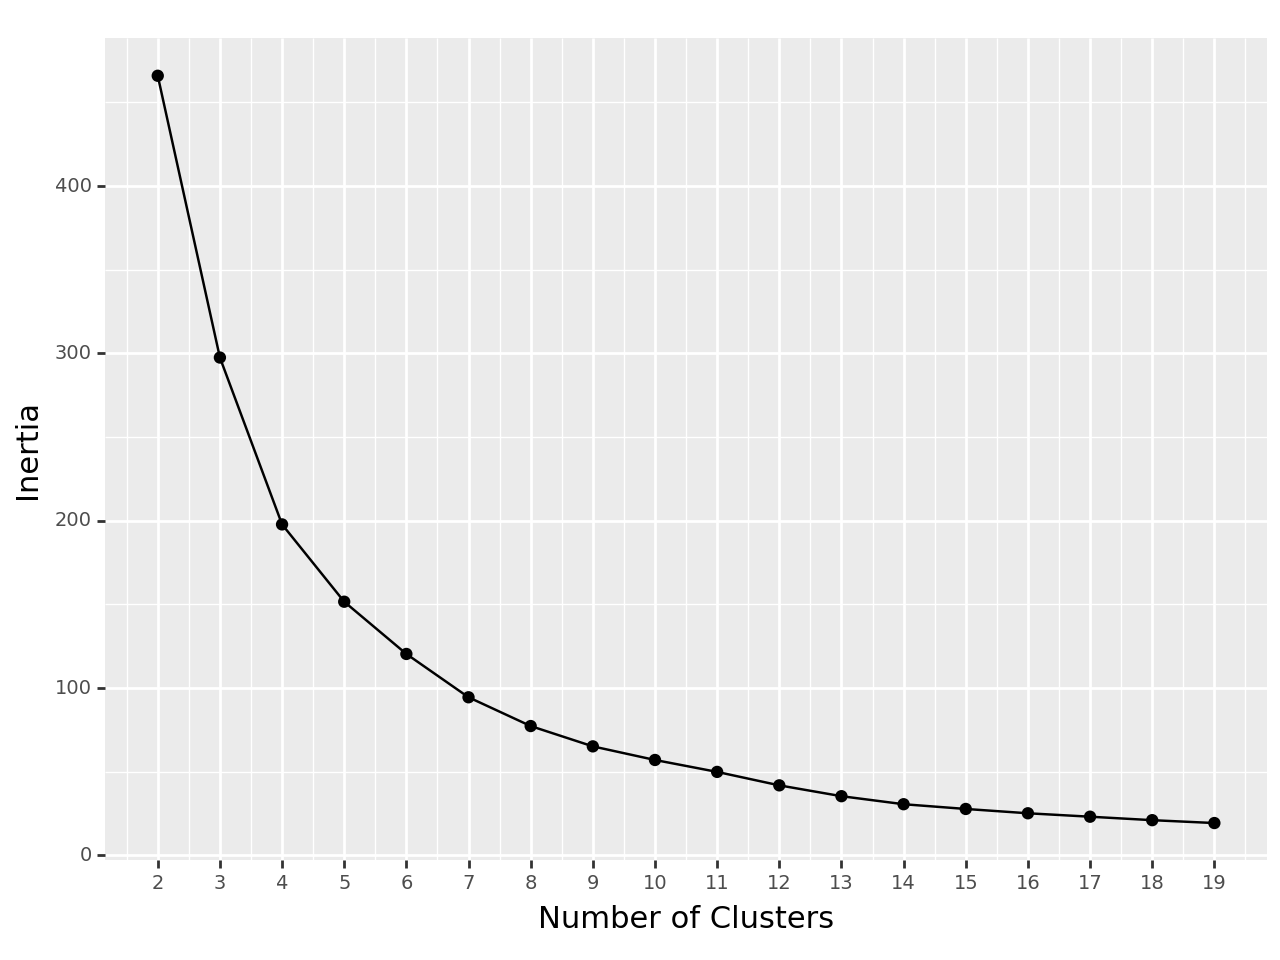

In [32]:
helperVisual.get_line_plot(df=df_elbow,
                         x_name='number_of_clusters',
                         y_name='inertia',
                         xlab_name="Number of Clusters",
                         ylab_name="Inertia",
                         x_continuous_breaks=np.arange(2, CLUSTER_L, 1)).draw()

In [33]:
# Set the number of clusters as .. and fit the model
CLUSTER_SELECTED = 8
kmeans = KMeans(n_clusters=CLUSTER_SELECTED, init='k-means++')
kmeans.fit(X_scaled)
prediction = kmeans.predict(X_scaled)

In [34]:
bands_mapping_ = { 'B1':'B01', 'B2':'B02', 'B3':'B03', 'B4':'B04', 'B5':'B05', 'B6':'B06', 'B7':'B07', 'B8':'B08', 'B8A':'B08A', 'B9':'B09', 'B11':'B11' }
bands_mapping = { 'B1':1, 'B2':2, 'B3':3, 'B4':4, 'B5':5, 'B6':6, 'B7':7, 'B8':8, 'B8A':9, 'B9':10, 'B11':11 }
bands_mapping_swapped = { v: k for k, v in bands_mapping.items() }

X_scaled_1 = X_scaled.copy().assign(Cluster = prediction)

X_melted = (
    X_scaled_1
    .rename(columns = bands_mapping)
    .melt(id_vars=['Cluster'], var_name='Band', value_name='Reflectance')
    .assign(Band = lambda x: x['Band'].astype(str).astype(int))
    .assign(Reflectance = lambda x: x['Reflectance'].astype(str).astype(float))
    .groupby(['Cluster', 'Band'])['Reflectance'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
    .assign(Cluster_ = lambda x: x['Cluster'].apply(lambda y: f'Cluster {str(y).zfill(2)}') + x['count'].apply(lambda z: f', ({z})'))
)
X_melted.head(3)

,Cluster,Band,count,mean,std,min,max,Cluster_
0,0,1,785,0.135981,0.027674,0.1146,0.3642,"Cluster 00, (785)"
1,0,2,785,0.136120,0.027015,0.1133,0.3352,"Cluster 00, (785)"
2,0,3,785,0.150252,0.022028,0.1262,0.3000,"Cluster 00, (785)"


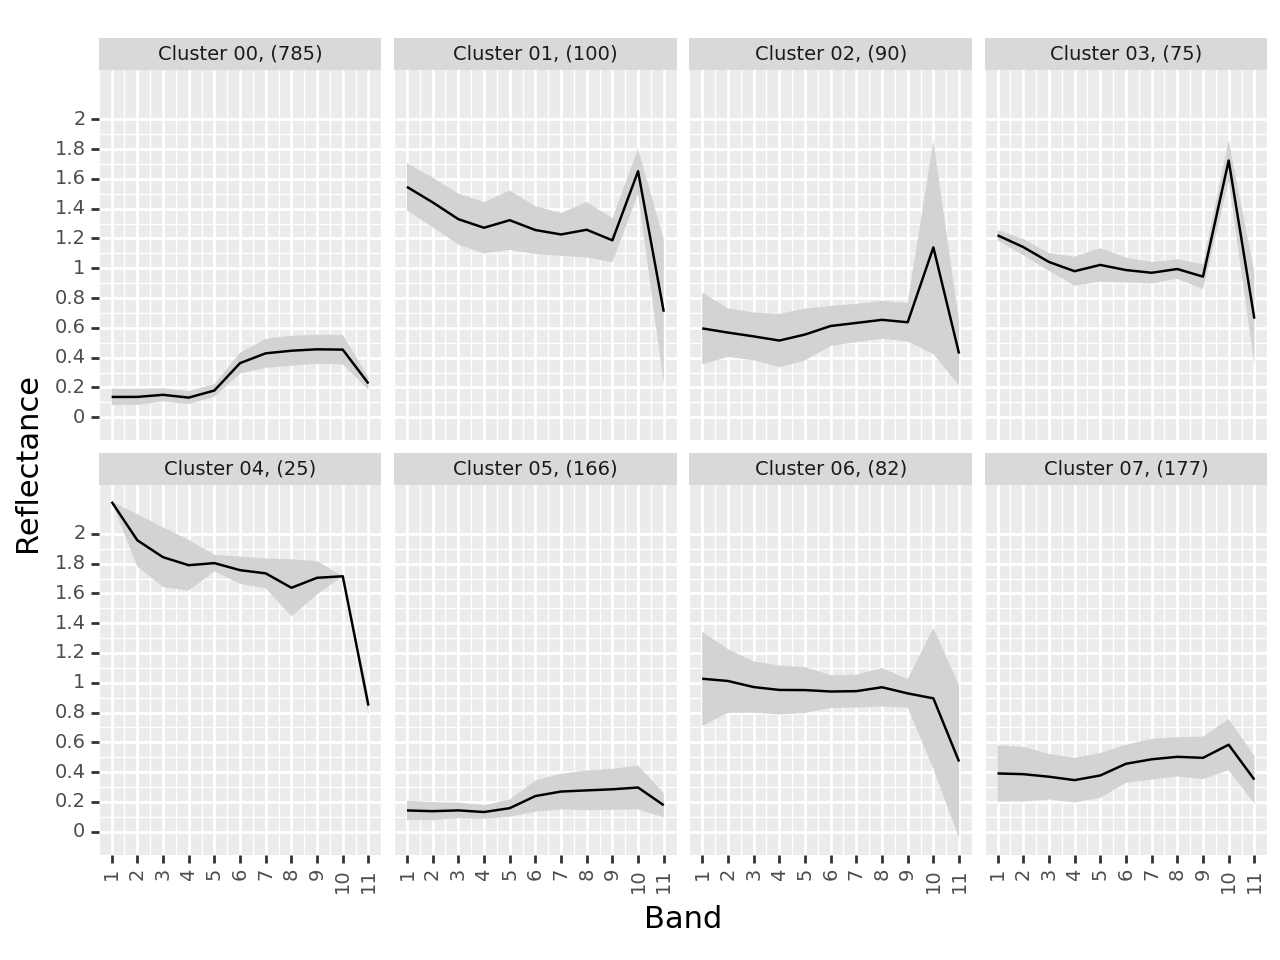

In [42]:
helperVisualRS.get_reflectance_signature_facets(X_melted,
                                                ncol=4,
                                                scale_x_continuous_breaks=np.arange(1, 12, 1),
                                                scale_y_continuous_breaks=np.arange(0, 2.1, 0.2)).draw()

In [36]:
# Assign 'Cluster' to initial data. Inner by index of prediction data.
df_out01_003_2_records_all_annotated_view = (df_out01_003_1_records_all_annotated_view[df_out01_003_1_records_all_annotated_view.index.isin(X_scaled_1.index)]
                                             .assign(Cluster = prediction))
print(df_out01_003_2_records_all_annotated_view.shape)
print(f"unique satellite dates {df_out01_003_2_records_all_annotated_view['PixelTime'].unique().shape} from "
      f"{df_out01_003_2_records_all_annotated_view['PixelTime'].min()} to "
      f"{df_out01_003_2_records_all_annotated_view['PixelTime'].max()}")
df_out01_003_2_records_all_annotated_view.head(3)

(1500, 62)
unique satellite dates (60,) from 2023-05-01 09:30:31 to 2023-09-28 09:30:31


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason,QualitySceneClassificationName,PixelTimeUtc,Cluster
0,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
1,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
2,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7


In [37]:
df_grouped = df_out01_003_2_records_all_annotated_view.groupby(['Cluster', 'QualitySceneClassificationName', 'QualitySceneClassification']).size().reset_index(name='count')
df_grouped.pivot(index=['QualitySceneClassification', 'QualitySceneClassificationName'], columns='Cluster', values='count')

,Cluster,0,1,2,3,4,5,6,7
QualitySceneClassification,QualitySceneClassificationName,,,,,,,,
10.0,Thin cirrus,67.0,NaN,NaN,NaN,NaN,33.0,NaN,4.0
3.0,Cloud shadows,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN
4.0,Vegetation,708.0,NaN,NaN,NaN,NaN,99.0,NaN,3.0
5.0,Not vegetated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7.0,Unclassified,9.0,NaN,NaN,NaN,NaN,5.0,NaN,20.0
8.0,Cloud medium probability,1.0,25.0,2.0,NaN,NaN,NaN,50.0,106.0
9.0,Cloud high probability,NaN,75.0,88.0,75.0,25.0,NaN,32.0,42.0


In [38]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df_grouped, r='count', 
                    theta='QualitySceneClassificationName', 
                    color='Cluster',
                    line_close=True)
fig.show()

In [39]:
PATH_OUTPUT = "../../../../data/sentinel2MsiL2/_out01/sentinel2MsiL2_out01_001_2.parquet"
df_out01_003_2_records_all_annotated_view.to_parquet(PATH_OUTPUT, index=True)
print(df_out01_003_2_records_all_annotated_view.shape)
print(f"unique satellite dates {df_out01_003_2_records_all_annotated_view['PixelTime'].unique().shape} from "
      f"{df_out01_003_2_records_all_annotated_view['PixelTime'].min()} to "
      f"{df_out01_003_2_records_all_annotated_view['PixelTime'].max()}")
pd.read_parquet(PATH_OUTPUT).head(3)

(1500, 62)
unique satellite dates (60,) from 2023-05-01 09:30:31 to 2023-09-28 09:30:31


,_dde,CalvalusID,Date_,Latitude,Longitude,SourceName,PixelTime,PixelX,PixelY,PixelLat,...,ViewZenithB10,ViewAzimuthB10,ViewZenithB11,ViewAzimuthB11,ViewZenithB12,ViewAzimuthB12,ExclusionReason,QualitySceneClassificationName,PixelTimeUtc,Cluster
0,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1992.0,58.282368,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
1,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1993.0,58.28219,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
2,20231108,000002_S2A_MSIL2A_20230501T093031_N9999_R136_T...,2023-05-01 00:00:00,58.281975,27.31296,S2A_MSIL2A_20230501T093031_N9999_R136_T35VNE_2...,2023-05-01 09:30:31,916.0,1994.0,58.282005,...,3.5991,125.533,3.71408,130.444,3.85522,135.048,None,Cloud high probability,1682933431,7
